In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge

### 1. Entreneu una regressió lineal amb totes les features i calculeu les accuracies de train i test. Feu servir la regressió lineal amb regularització tant de Ridge com de Lasso. Escolliu el millor valor pel parametre de regularització i comenteu les diferències entre Ridge i Lasso així com els seus resultats.

Primer carreguem el Dataset.

In [29]:
file_path = r'C:\Users\USER\Desktop\3r\1r semestre\Aprenentatge Computacional\Exercicis\02.Regressio\data\StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

Seguidament, canviem totes aquelles variables de tipus "object" a tipus "int". 

In [30]:
from sklearn.preprocessing import LabelEncoder

non_numeric = df.select_dtypes(include=['object']).columns

for column in non_numeric:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

A continuació, decidim quina serà la variable dependent, és a dir, la feature que volem predir en funció de les variables explicatives, en el nostre cas sera la variable **Exam_Score** i normalitzem. 

In [31]:
target_att = 'Exam_Score'
attributes = [k for k in df.keys() if k!= target_att]
X = df[attributes]
y = df[[target_att]]

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y)

Separem el dataset en el conjunt d'entrenament i de prova per tal de poder generalitzar correctament. Seguidament, creem la regressió lineal i calculem els seus coeficients de determinació.  

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_norm,y_norm,test_size = 0.3)

lr = LinearRegression(fit_intercept = True)
lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print (r2_train,r2_test)


0.6553064295899684 0.6398156293357777


El nombre dels coeficients ens indica que el **65.53%**(train) i **63.98%**(test) de la variabilitat del conjunt es pot explicar pel model.

Els coeficients dels dos conjunts són molt similars. Això és una bona senyal, ja que indica que el model està funcionant de manera coherent tant amb les dades que ha vist durant l’entrenament (train) com amb dades noves (test). Així doncs, el model generalitza bé. No obstant, observem que és un valor bo però no perfecte.  

A continuació, calculem les regularitzacions tant de Ridge com de Lasso per tal de veure si podem millorar el model. 

Primerament, calculem **Lasso**. 

Per tal d'escollir la millor alpha i tenir en compte tant el rendiment com l'estabilitat, he comparat la diferència entre els $R^2$ del conjunt d'entrenament (train) i de validació (test) per evitar l'overfitting. A més, he aplicat un llindar mínim al valor del $R^2$ tant del train com del test, assegurant-me que el model no pateixi d'underfitting. D'aquesta manera, el valor d'alpha escollit maximitza el rendiment del model alhora que garanteix que no es sobreajusti ni tingui un rendiment massa pobre.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.107e+02, tolerance: 4.704e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

El millor alpha és 0.15 amb la mínima diferència de R² de 0.0094
R² per l'entrenament amb el millor alpha: 0.5144
R² per al test amb el millor alpha: 0.5050
Alpha: 0.0
Característiques amb coeficient zero: []
Característiques amb coeficient diferent de zero: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Alpha: 0.01
Característiques amb coeficient zero: ['Sleep_Hours', 'School_Type', 'Gender']
Característiques amb coeficient diferent de zero: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality'

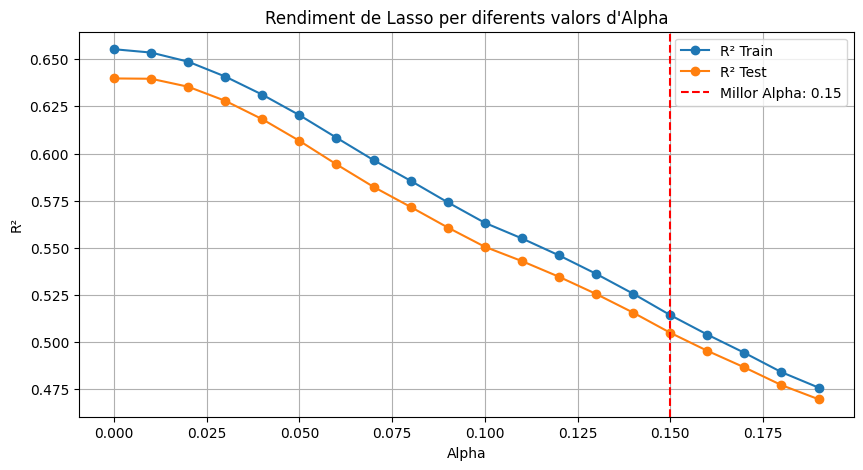

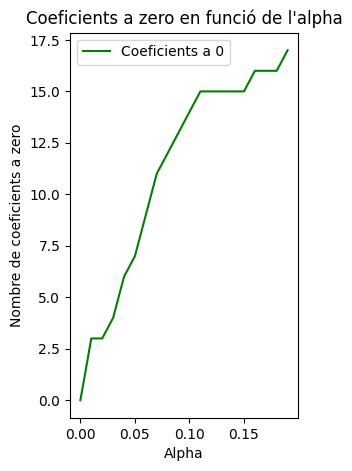

In [34]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

alphas = np.arange(0, 0.2, 0.01)
feature_names = attributes  
r2_train_list = []
r2_test_list = []
coef_zero_features = {}
best_alpha = None
min_r2_diff = np.inf
r2_diff_list = []
min_r2_llindar = 0.5

#Per diferents valors d'alpha ens quedem amb la millor
for alpha in alphas:
    lass = Lasso(alpha=alpha)
    lass.fit(X_train, y_train)

    y_pred_train = lass.predict(X_train)
    y_pred_test = lass.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    
    r2_diff = abs(r2_train - r2_test)
    r2_diff_list.append(r2_diff)

    #Ens assegurem que el model no pateixi underfitting
    if r2_test >= min_r2_llindar and r2_train >= min_r2_llindar and r2_diff < min_r2_diff:
        min_r2_diff = r2_diff
        best_alpha = alpha
        best_r2_train = r2_train  
        best_r2_test = r2_test   
        best_zero_coef_idx = np.where(lass.coef_ == 0)[0]  
        best_non_zero_coef_idx = np.where(lass.coef_ != 0)[0]  

    # Característiques amb coeficients zero per cada alpha
    zero_coef_idx = np.where(lass.coef_ == 0)[0] 
    zero_coef_features = [feature_names[i] for i in zero_coef_idx]  
    coef_zero_features[alpha] = zero_coef_features

# Mostrem els resultats del millor alpha
print(f"El millor alpha és {best_alpha} amb la mínima diferència de R² de {min_r2_diff:.4f}")
print(f"R² per l'entrenament amb el millor alpha: {best_r2_train:.4f}")
print(f"R² per al test amb el millor alpha: {best_r2_test:.4f}")

# Mostrem les característiques amb coeficients zero per cada alpha
for alpha in alphas:
    print(f"Alpha: {alpha}")
    zero_coef_features = coef_zero_features[alpha]
    print(f"Característiques amb coeficient zero: {zero_coef_features}")

    # Característiques amb coeficients diferents de zero
    non_zero_coef_features = [feature for feature in feature_names if feature not in zero_coef_features]
    print(f"Característiques amb coeficient diferent de zero: {non_zero_coef_features}")

print("-" * 40)
print(f"*** Característiques pel millor alpha ({best_alpha}) ***")
best_zero_features = [feature_names[i] for i in best_zero_coef_idx]
best_non_zero_features = [feature_names[i] for i in best_non_zero_coef_idx]
print(f"Atributs amb coeficients zero: {best_zero_features}")
print(f"Atributs amb coeficients diferents de zero: {best_non_zero_features}")


# Gràfic del rendiment de Lasso per diferents valors d'alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_train_list, label="R² Train", marker='o')
plt.plot(alphas, r2_test_list, label="R² Test", marker='o')
plt.axvline(best_alpha, color='r', linestyle='--', label=f"Millor Alpha: {best_alpha}")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.legend()
plt.title("Rendiment de Lasso per diferents valors d'Alpha")
plt.grid(True)
plt.show()

# Gràfic dels coeficients zero en funció d'alpha
plt.figure(figsize=(10, 5))
n_coef_zeros = [len(coef_zero_features[alpha]) for alpha in alphas]
plt.subplot(1, 3, 2)
plt.plot(alphas, n_coef_zeros, label='Coeficients a 0', color='green')
plt.xlabel('Alpha')
plt.ylabel('Nombre de coeficients a zero')
plt.title('Coeficients a zero en funció de l\'alpha')
plt.legend()
plt.show()


Primerament, observem com la tendència general és que a mesura que incrementem alpha, més característiques són descartades (tindran coeficients zero). Això és un comportament esperat del model Lasso, que busca simplificar el model i mantenir només aquelles característiques que aporten un valor significatiu a les prediccions. 

Així doncs, podem observar com les característiques menys importants seran les primeres que Lasso converteix els coeficients a zero, les quals són: **Sleep_Hours**, **School_Type** i **Gender**. En canvi, les més importants seran aquelles en que es troben en la última llista de característiques amb coefcients diferents de zero les quals són: **Hours_Studied** i **Attendance** entre d'altres. 


En el primer gràfic observem com R² disminueix a mesura que augmenta l'alpha. Això és esperable, ja que per valors més grans d'alpha, s'incrementa la força de la penalització, limitant la magnitud dels coeficients i fins i tot anul·lant-ne alguns. 
També veiem que les dades d'entrenament mostren un comportament similar a les del test. No obstant, les del train tenen valors d'R² més alts que les dades del test. 

A més, s'observa una línia vertical que indica el valor òptim d'alpha, que en aquest cas és **0.15**. Això vol dir que el millor rendiment del model es dóna quan s'eliminen les característiques **['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']**. I en aquesta cas els coeficients de determinació són: **0.5144** i **0.5050** amb una diferència de **0.0094**. Així doncs, en aquest cas el model s'ha simplificat, això ha causat que obtinguem uns coeficients de determinació menors que si no haguéssim aplicat la regularització. 
 
En el segon gràfic observem aquest augment dels coeficients que es converteixen en zero. A valors baixos d'alpha, la majoria de coeficients es mantenen, però en augmentar alpha, molts coeficients s'anul·len. Això indica que la regularització està fent efecte, eliminant els paràmetres menys rellevants.

A continuació apliquem el model Ridge. 

El millor alpha és 1900 amb la mínima diferència de R² de 0.0063
R² per l'entrenament amb el millor alpha: 0.5995
R² per al test amb el millor alpha: 0.5932
Alpha: 0
Característiques amb coeficient zero: []
Característiques amb coeficient diferent de zero: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
----------------------------------------
Alpha: 100
Característiques amb coeficient zero: []
Característiques amb coeficient diferent de zero: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'T

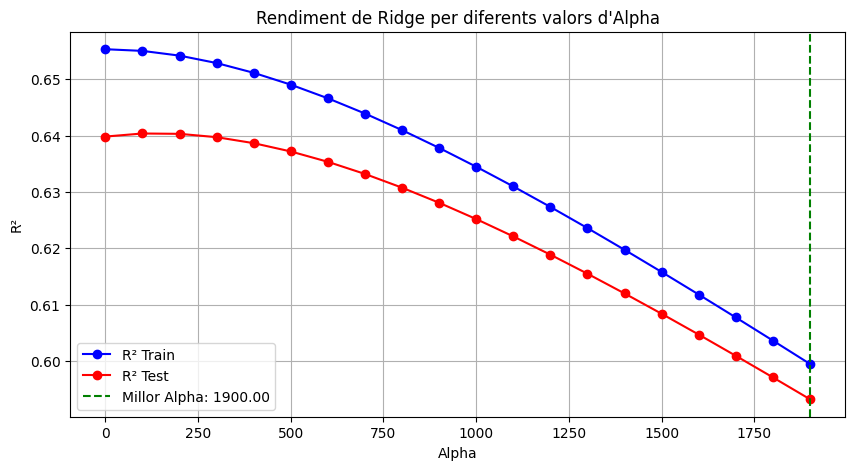

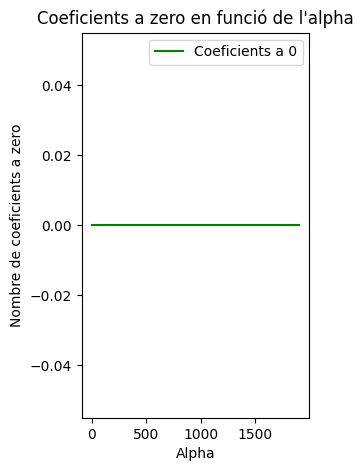

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alphas = np.arange(0, 2000, 100)

r2_train_list_1 = []
r2_test_list_1 = []

for alpha in alphas:
    rid = Ridge(alpha=alpha)
    rid.fit(X_train, y_train)

    y_pred_train = rid.predict(X_train)
    y_pred_test = rid.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    r2_train_list_1.append(r2_train)
    r2_test_list_1.append(r2_test)
    
    # Calcular la diferència de R²
    r2_diff = abs(r2_train - r2_test)
    r2_diff_list.append(r2_diff)

    # Actualitzar el millor alpha si s'escau
    if r2_test >= min_r2_llindar and r2_train >= min_r2_llindar and r2_diff < min_r2_diff:
        min_r2_diff = r2_diff
        best_alpha = alpha
        best_r2_train_1 = r2_train  
        best_r2_test_1 = r2_test    
        

    # Obtenir coeficients zero
    zero_coef_idx = np.where(rid.coef_ == 0)[0] 
    zero_coef_features = [feature_names[i] for i in zero_coef_idx]  
    
    coef_zero_features[alpha] = zero_coef_features

print(f"El millor alpha és {best_alpha} amb la mínima diferència de R² de {min_r2_diff:.4f}")
print(f"R² per l'entrenament amb el millor alpha: {best_r2_train_1:.4f}")
print(f"R² per al test amb el millor alpha: {best_r2_test_1:.4f}")

# Imprimir característiques amb coeficients zero i no zero
for alpha in alphas:
    print(f"Alpha: {alpha}")
    zero_coef_features = coef_zero_features[alpha]
    print(f"Característiques amb coeficient zero: {zero_coef_features}")

    # Calcular les característiques amb coeficients diferents de zero
    non_zero_coef_features = [feature for feature in feature_names if feature not in zero_coef_features]
    print(f"Característiques amb coeficient diferent de zero: {non_zero_coef_features}")

    print("-" * 40)



plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_train_list_1, label="R² Train", marker='o', color='blue')
plt.plot(alphas, r2_test_list_1, label="R² Test", marker='o', color='red')
plt.axvline(best_alpha, color='green', linestyle='--', label=f"Millor Alpha: {best_alpha:.2f}")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.legend()
plt.title("Rendiment de Ridge per diferents valors d'Alpha")
plt.grid(True)
plt.show()

# Graficar coeficients a zero
plt.figure(figsize=(10, 5))
n_coef_zeros = [len(coef_zero_features[alpha]) for alpha in alphas]
plt.subplot(1, 3, 2)
plt.plot(alphas, n_coef_zeros, label='Coeficients a 0', color='green')
plt.xlabel('Alpha')
plt.ylabel('Nombre de coeficients a zero')
plt.title('Coeficients a zero en funció de l\'alpha')
plt.legend()
plt.show()


En aquest cas observem com cap dels coeficients es converteix a zero. Això és degut a que Ridge redueix els coeficients pero sense arribar a convertir-los a zero. 

A la primera gràfica ens mostra com l'R² tant del conjunt de test com de train decreixen lleugerament a mesura que augmenta l'alpha. Això es deu a que a mesura que alpha augmenta, el model és cada vegada més senzill.

Segons els resultat d'aquest model, el millor valor d'alpha és **1900** i els seus coeficients de determinació són: **0.5995**
i **0.5932** amb na diferència de **0.0063**. 

En el segon gràfic es corrabora com cap dels coeficients es converteix en zero i per tant, no s'elimina cap característica. 

Finalment, observem com hi ha una gran diferència entre els paràmetres de regularització dels dos models. 

Això és degut a que Lasso aplica una penalització en la magnitud absoluta dels coeficients, el que significa que té un efecte més fort i per tant, amb una alpha petita ja es pot veure una regularització significativa. En canvi, Ridge aplica una penalització en el quadrat dels coeficients, cosa que té un efecte més suau que Lasso, ja que només redueix la magnitud dels coeficients però no els fa zero.

Això vol dir que, per aconseguir una regularització significativa en Ridge, sovint necessitem valors d'alpha molt més grans per notar un efecte substancial en els coeficients.

### 2. Implementeu un metode iteratiu per tal d'escollir fetaures. Apliqueu-lo al vostre problema i compareu les features selecccionades aixi com els resultats obtinguts amb els obtinguts amb la regularització de Lasso en l'apartat anterior.

Primerament, mirem la importància de cada coeficient per tenir una intuició prèvia de quines són les característiques més importants.

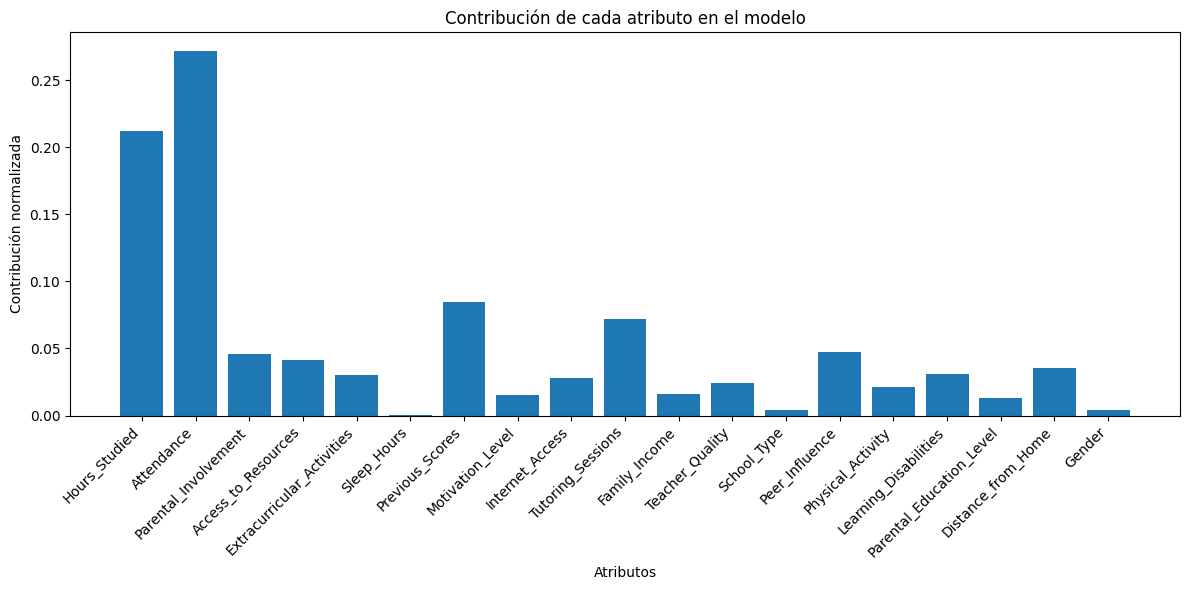

In [36]:
import numpy as np
import matplotlib.pyplot as plt


coefs = np.abs(lr.coef_[0])  
coefs = coefs / np.sum(coefs)  
plt.figure(figsize=(12, 6))

plt.bar(np.arange(len(coefs)), coefs)

plt.xticks(np.arange(len(coefs)), attributes, rotation=45, ha='right')  # Ajustar la alineación

plt.xlabel('Atributos')
plt.ylabel('Contribución normalizada')
plt.title('Contribución de cada atributo en el modelo')

plt.tight_layout()  
plt.show()


Per tant, com a hipòtesis inicial podem dir que el nostre mètode seleccionarà les features **"Hours_Studied"** i **"Attendance"** com a features més importants i eliminaria **"School_type"** i **"Gender"** com a més irrellevants. 

El nostre mètode es basarà en dues parts: Primerament fer una combinació entre els dos mètodes de regularització els quals són **Lasso** i **Ridge** anomenat **Elastic Net** per tal de poder obtenir els beneficis dels dos mètodes.

Per un costat **Lasso** pot eliminar les variables no rellevants i per tant permet fer una sel·lecció dels features més importants però en presència de col·linearitat elevada, és a dir, quan diverses variables estan correlacionades, Lasso tendeix a seleccionar només una d'aquestes variables i elimina les altres, la qual cosa pot provocar inestabilitat en el model.

En canvi, **Ridge** és molt útil quan les variables estan altament correlacionades entre elles, ja que distribueix la influència de manera més equitativa entre les variables correlacionades, però no fa selecció de variables, és a dir, manté totes les variables en el model, només ajustant els seus coeficients. Això pot fer que el model sigui menys interpretable si es vol identificar quines variables són realment importants. Com més alt sigui Alpha, més s'apropa el model a la regressió Ridge; com més petit sigui, més s'apropa a Lasso.


I seguidament, aplicarem la **validació creuada** per poder escollir el millor paràmetre de regularizació. 

Aquest mètode consisteix a dividir el conjunt de dades, en el nostre cas en 5 subconjunts aproximadament iguals, per a cada valor de alpha, el model s'entrena 5 vegades, utilitzant en cada iteració un subconjunt diferent com a conjunt de validació, mentre que els altres 5-1 subconjunts es fan servir per entrenar el model.

Després de cada iteració, es calcula el rendiment del model amb la mètrica R² per avaluar la precisió de les prediccions.

Quan es completa la validació creuada per tots els valors d'alpha, es calcula la mètrica mitjana del rendiment. El valor d'alpha que proporcioni el millor rendiment mitjà durant la validació creuada serà escollit com el millor valor per l'ajust del model.


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1347.7856402624916, tolerance: 0.3921129205098985
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\USER\AppData\Local\Program

Millor l1_ratio: 0.9494949494949496
Millor alpha: 0.0011513953993264468
R² Train: 0.6552838929364485
R² Test: 0.6400200575921913

Features seleccionades (coeficients no zero):
                Característica  Coeficient
1                   Attendance    0.586449
0                Hours_Studied    0.457791
5              Previous_Scores    0.181631
8            Tutoring_Sessions    0.154165
12              Peer_Influence    0.101833
16          Distance_from_Home    0.074986
4   Extracurricular_Activities    0.064924
7              Internet_Access    0.059134
13           Physical_Activity    0.044549
15    Parental_Education_Level    0.026360
11                 School_Type    0.007721
17                      Gender   -0.008478
6             Motivation_Level   -0.031928
9                Family_Income   -0.034164
10             Teacher_Quality   -0.051936
14       Learning_Disabilities   -0.066509
3          Access_to_Resources   -0.089001
2         Parental_Involvement   -0.097739

Featur

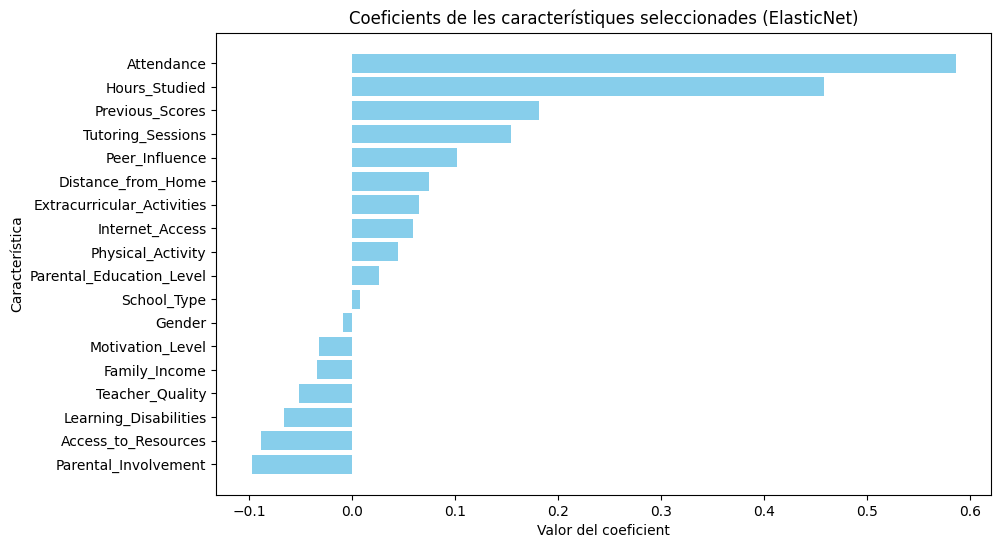

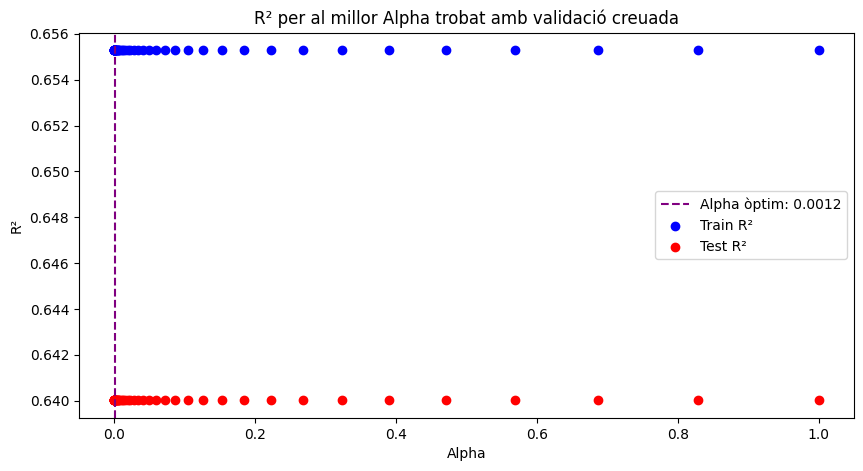

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score


feature_names = attributes

features_seleccionades = []
features_eliminades = []
l1_ratios = np.linspace(0, 1, 100)  
alphas = np.logspace(-4, 0, 50)   

enet_cv = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5, random_state=42)

enet_cv.fit(X_train, y_train)

y_pred_train = enet_cv.predict(X_train)
y_pred_test = enet_cv.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Millor l1_ratio: {enet_cv.l1_ratio_}")
print(f"Millor alpha: {enet_cv.alpha_}")
print(f"R² Train: {r2_train}")
print(f"R² Test: {r2_test}")

coeficients = enet_cv.coef_


#Sel·leccionem quins són els coeficients que són convertits a zero i quins no
for i, coef in enumerate(coeficients):
    if coef != 0:
        features_seleccionades.append((feature_names[i], coef))  
    else:
        features_eliminades.append(feature_names[i])  
   
df_seleccionades = pd.DataFrame(features_seleccionades, columns=['Característica', 'Coeficient']).sort_values(by='Coeficient', ascending=False)
print("\nFeatures seleccionades (coeficients no zero):")
print(df_seleccionades)

df_eliminades = pd.DataFrame(features_eliminades, columns=['Característica'])
print("\nFeatures eliminades (coeficients zero):")
print(df_eliminades)

plt.figure(figsize=(10, 6))
plt.barh(df_seleccionades['Característica'], df_seleccionades['Coeficient'], color='skyblue')
plt.xlabel("Valor del coeficient")
plt.ylabel("Característica")
plt.title("Coeficients de les característiques seleccionades (ElasticNet)")
plt.gca().invert_yaxis() 
plt.show()

plt.figure(figsize=(10, 5))
plt.axvline(x=enet_cv.alpha_, color='purple', linestyle='--', label=f'Alpha òptim: {enet_cv.alpha_:.4f}')
plt.scatter(alphas, [r2_train]*len(alphas), label='Train R²', color='blue')
plt.scatter(alphas, [r2_test]*len(alphas), label='Test R²', color='red')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('R² per al millor Alpha trobat amb validació creuada')
plt.legend()
plt.show()



En aquest cas el model ha escollit com a alpha apropiada al voltant de **0.00115**. Per aquesta alpha ens diu que només hauriem d'eliminar la feature **Sleep_Hours**. I per tant, si comparem aquest model amb el de Lasso, observem una gran diferència, ja que aquest model només ha eliminat una característica, en canvi Lasso n'ha eliminat 15. No obstant, veiem a la taula de coeficients diferents a zero que molts d'aquests tenen valors molt propers a 0. Així doncs, podem dir que la variable **Sleep_Hours** és la que menys importància té a l'hora de predir **Exam_Score**.  


EN quant a la l1 ratio hem obtingut un valor de **0.949**. Aquest ratio és el paràmetre que controla el pes relatiu de cadascuna de les regularitzacions. Això significa que en aquest cas, el model aplica en major proporció el model Lasso que el Ridge, ja que si la ratio s'apropa al valor 0, el model es converteix en Ridge. En canvi, si s'apopa al valor 1, es converteix en Lasso.  

A més, en aquest cas hem obtingut uns valors de **0.6552** i **0.6400** pel que fa als coeficients de determinació. Observem doncs que són millors que els obtinguts en el model de Lasso. 

### 3. Implementeu un metode iteratiu (diferent al de l'apartat 2) per tal d'escollir fetaures. Apliqueu-lo al vostre problema i compareu les features selecccionades així com els resultats obtinguts amb els obtinguts amb la regularització de Lasso en l'apartat anterior.

He implementat un **Random Forest Regressor** per poder determinar la importància de les característiques. Aquest mètode utilitza diversos arbres de decisió independents, cadascun entrenat amb subconjunts aleatoris de les dades i característiques. Els arbres divideixen les dades en funció de les característiques i fan prediccions numèriques. És a dir, quan una característica s'utilitza per dividir les dades, es mesura com aquesta divisió redueix l'error de predicció. Si una característica redueix molt l'error a diverses parts de l'arbre, es considera que té una gran importància. La importància final d'una característica es calcula com la mitjana de totes les millores d'error en què ha participat, sumades a través de tots els arbres del bosc, el que redueix el risc d'overfitting.

Així doncs, si la importància d'una característica és molt alta indica que la característica és significativa, ja que contribueix molt a la capacitat del model per fer bones prediccions.

Per poder aplicar això al meu model, he afegit uns llindars en que determinen quines característiques tenen una importància menor que aquest cert valor i per tant, poder identificar quines són les característiques que no aporten informació significativa al model. Quant més gran sigui el llindar, més característiques s'eliminaran. 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² Train: 0.9465
R² Test: 0.6582


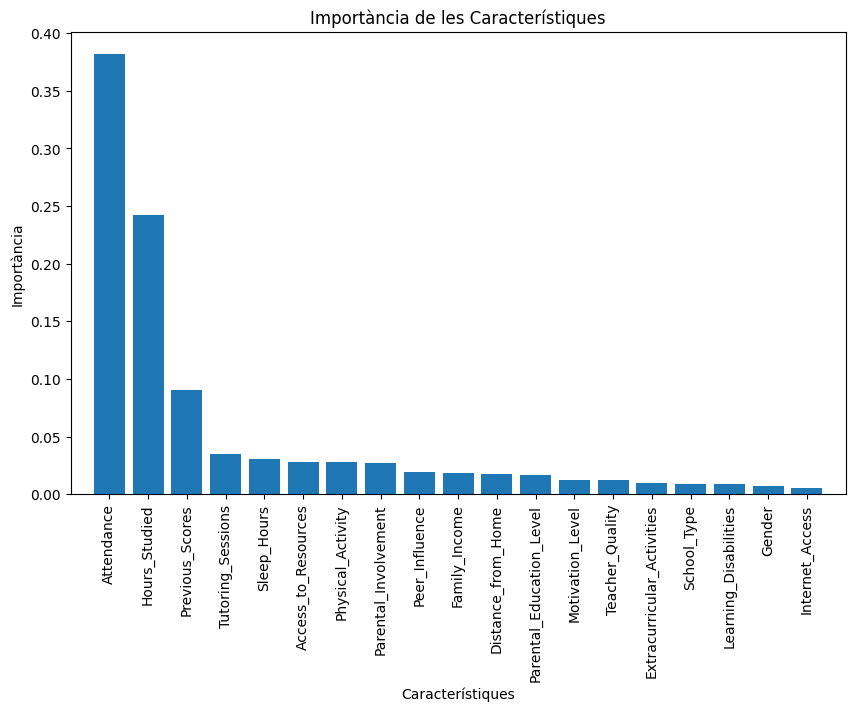


Característiques que s'eliminarien amb un llindar de 0.01:
['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']

Característiques que s'eliminarien amb un llindar de 0.05:
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Característiques que s'eliminarien amb un llindar de 0.1:
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Característiques que s'eliminarien amb un lli

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

feature_names = attributes  

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"R² Train: {r2_train:.4f}")
print(f"R² Test: {r2_test:.4f}")

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importància de les Característiques")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Característiques")
plt.ylabel("Importància")
plt.show()

llindars = [0.01, 0.05, 0.1, 0.2, 0.3]  

for llindar in llindars:
    eliminated_features = [feature_names[i] for i in range(len(importances)) if importances[i] <= llindar]
    
    print(f"\nCaracterístiques que s'eliminarien amb un llindar de {llindar}:")
    print(eliminated_features)


En aquest model podem observar com la diferència entre l'$R^2$ d'entrenament i de prova (**0.9465** i **0.6582**) és bastant significativa comparat amb les que hem vist anteriorment. Això podria indicar que el model podria haver-se ajustat massa a les dades d'entrenament i per tant tenir overfitting.

Podem afirmar que les característiques menys importants seran aquelles eliminades amb el llindar més petit, és a dir, de 0.01. En aquest cas s'eliminen les característiques que tenen una importància molt baixa (≤0.01) i per tant, gairebé no contribueixen al model. S'eliminarien les següents característiques: **Extracurricular_Activities**, **Internet_Access**, **School_Type**, **Learning_Disabilities** i **Gender**. 

També hem de tenir en compte que definir un llindar proper a 0.1 o superior, no ajuda a l'hora de seleccionar les característiques. Atès que s'elimina un nombre significatiu de característiques i per tant es pot perdre informació i fer que el model sigui massa senzill. 

Podem concloure doncs que el model Lasso és millor atès que en general, és millor tenir coeficients de determinació similars i lleugerament més baixos, ja que indica que el model és més equilibrat, generalitza millor i és menys probable que estigui sobreajustat. I per tant, no és necessàri eliminar les característiques **Extracurricular_Activities**, **Internet_Access**, **School_Type**, **Learning_Disabilities** i **Gender**. 


### 4. Compareu els metodes 2 i 3 a nivell conceptual. Quins son els pros/contres dels dos metodes?

**Elastic Net** no està sobreajustant les dades ja que no hi ha gairebé diferència entre R² Train i Test. Així doncs, el model funciona relativament bé en dades que poden estar correlacionades, però la seva limitació és que només captura relacions lineals. Per això, no arriba a una precisió molt alta. 

En canvi, al **Random Forest regressor** tot i que hi ha una gran diferència en el rendiment del seu conjunt, és més flexible i pot capturar relacions no lineals, per això el seu R² és més alt. Tot i que és possible que hi hagi un lleuger sobreajustament, ja que la diferència entre el R² de Train i Test és més significativa.

Pel que fa a les característiques, **Elastic net** pot eliminar característiques i per tant deixar els seus coeficients a zero. En canvi **Random Forest** no elimina completament les característiques, sinó que proporciona una mesura d'importància.

Així doncs, **Elastic Net** té una major capacitat de generalització perquè utilitza regularització tant de Lasso com de Ridge per controlar l’overfitting. Però tot i que és menys probable que sobreadapti les dades comparat amb l'altre model, no ajusta tan bé les dades d’entrenament com **Random Forest** i pot no tenir un rendiment tan bo en situacions amb relacions no lineals o dades amb moltes característiques irrellevants.


En canvi **Random Forest** té un alt risc d'overfitting, especialment quan s'ajusta massa bé a les dades d'entrenament, com es veu en el seu alt valor de R² en Train comparat amb el de Test. I per tant, encara que generalitzi bé, pot ajustar-se massa bé a les dades d'entrenament, especialment si no es controla bé la profunditat dels arbres.

Per acabar, ens quedem amb el model **Elastic Net** perquè ha demostrat un millor rendiment que **Lasso**, gràcies a la seva combinació de les tècniques de Lasso i Ridge. A més, s'ha vist que és el que millor generalitza, sobretot en comparació amb **Random Forest**.
Així doncs, eliminariem la característica **Sleep_Hours** i ens quedariem amb l'alpha = 0.00115. 